In [122]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

## Loading of Dataset

In [123]:
df = pd.read_csv('D:\AIT\Sem 1\Machine Learning\Medical_prediction\Medical_prediction\data\disease_insurance_price_merged.csv')

In [124]:
df.shape

(1338, 15)

In [125]:
pd.set_option('display.max_columns', None)
df.head()

,age,sex,bmi,children,smoker,region,charges,disease,sedantry period,junk food consumption,alcohol consumption,exercise routine,substance use,stress level,charges_bins
0,19.0,female,27.900,0,yes,southwest,16884.92400,Chickenpox,NaN,NaN,NaN,NaN,NaN,NaN,A
1,NaN,male,33.770,1,no,southeast,1725.55230,Hypoglycemia,12hrs,,no,,no,,A
2,28.0,male,33.000,3,no,southeast,4449.46200,Hypoglycemia,2hrs,daily,rarely,frequently,,,A
3,33.0,male,22.705,0,no,northwest,21984.47061,Dengue,NaN,NaN,NaN,NaN,NaN,NaN,A
4,32.0,male,28.880,0,no,northwest,3866.85520,Hypoglycemia,2hrs,frequently,rarely,daily,yes,,A


In [126]:
df.shape

(1338, 15)

In [127]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1338.000000,1338.000000,1338.000000
mean,39.222887,30.663397,1.094918,13270.422265
std,14.043228,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [128]:
df.dtypes

age                      float64
sex                       object
bmi                      float64
children                   int64
smoker                    object
region                    object
charges                  float64
disease                   object
sedantry period           object
junk food consumption     object
alcohol consumption       object
exercise routine          object
substance use             object
stress level              object
charges_bins              object
dtype: object

In [129]:
# Assuming you have a DataFrame named 'df'
df = df.rename(columns={
    'alcohol consumption': 'alcohol_consumption',
    'sedantry period': 'sed_pd',
    'exercise routine': 'exercise_routine',
    'junk food consumption': 'junk_food_consumption',
    'stress level': 'stress_level',
    'substance use': 'substance_use'
})


In [130]:
df.head()

,age,sex,bmi,children,smoker,region,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins
0,19.0,female,27.900,0,yes,southwest,16884.92400,Chickenpox,NaN,NaN,NaN,NaN,NaN,NaN,A
1,NaN,male,33.770,1,no,southeast,1725.55230,Hypoglycemia,12hrs,,no,,no,,A
2,28.0,male,33.000,3,no,southeast,4449.46200,Hypoglycemia,2hrs,daily,rarely,frequently,,,A
3,33.0,male,22.705,0,no,northwest,21984.47061,Dengue,NaN,NaN,NaN,NaN,NaN,NaN,A
4,32.0,male,28.880,0,no,northwest,3866.85520,Hypoglycemia,2hrs,frequently,rarely,daily,yes,,A


## EDA

In [131]:
df.isnull().sum()


age                        1
sex                        0
bmi                        0
children                   0
smoker                     0
region                     0
charges                    0
disease                    0
sed_pd                   571
junk_food_consumption    571
alcohol_consumption      571
exercise_routine         571
substance_use            571
stress_level             571
charges_bins               1
dtype: int64

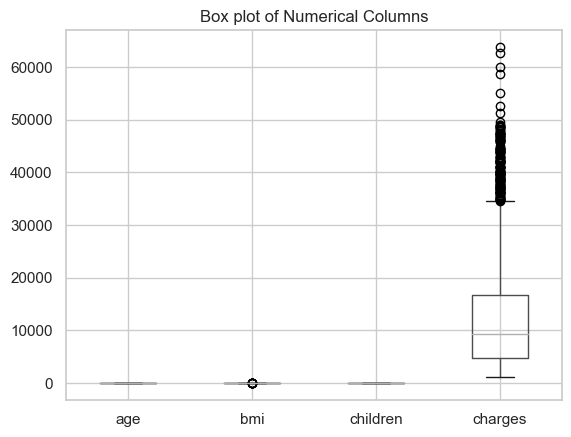

In [132]:
# Visualize box plots for numerical columns 
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [133]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

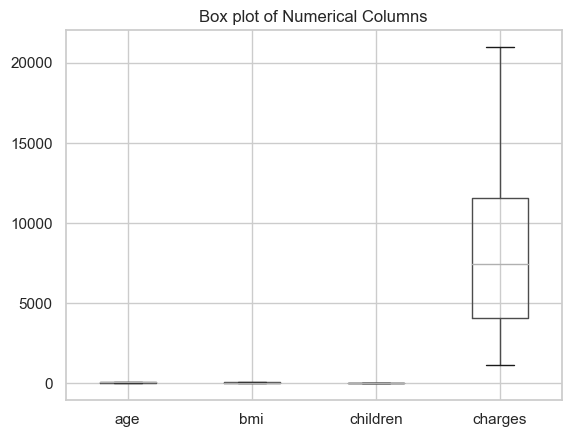

In [134]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_22176\3397924516.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_cleaned['charges'], kde = True, color = 'c')


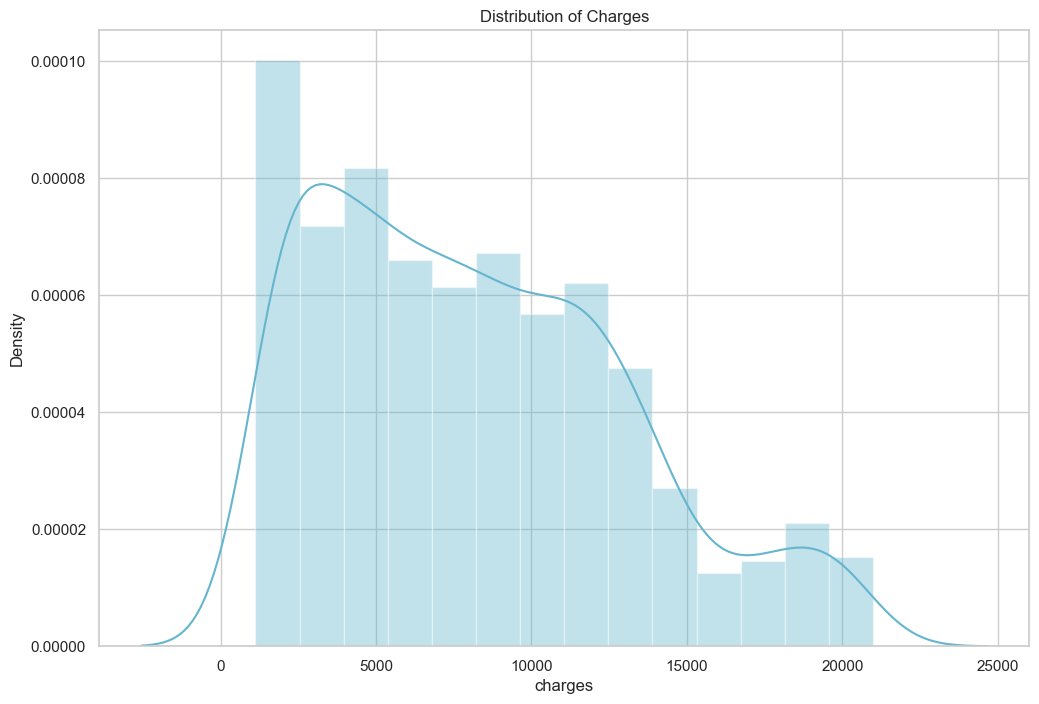

In [135]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df_cleaned['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_22176\2733648635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df_cleaned['charges']), kde = True, color = 'r' )


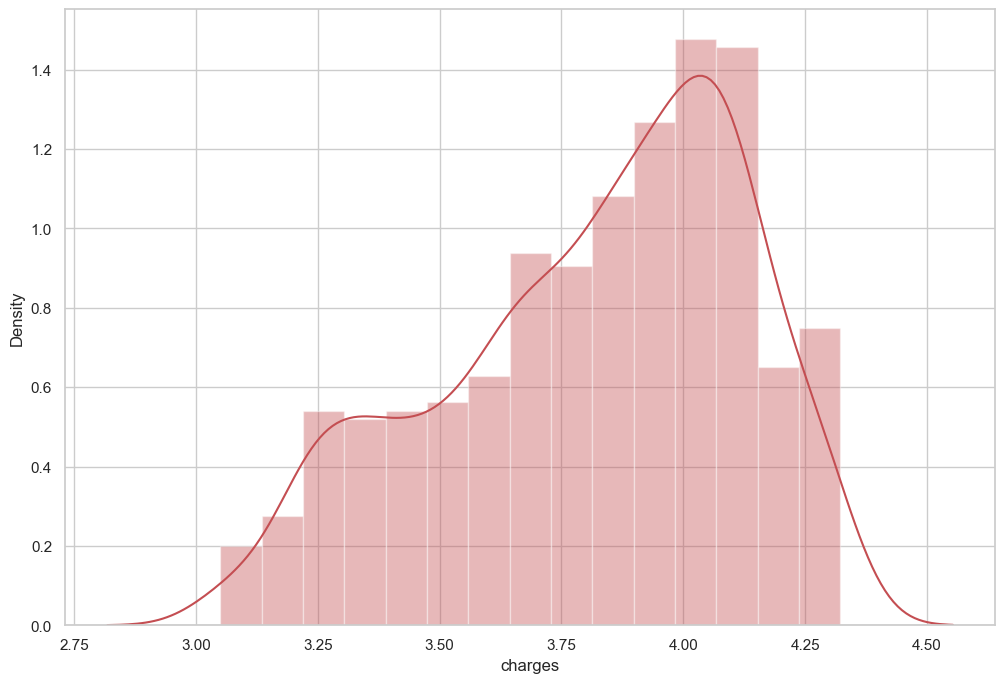

In [136]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df_cleaned['charges']), kde = True, color = 'r' )
plt.show()

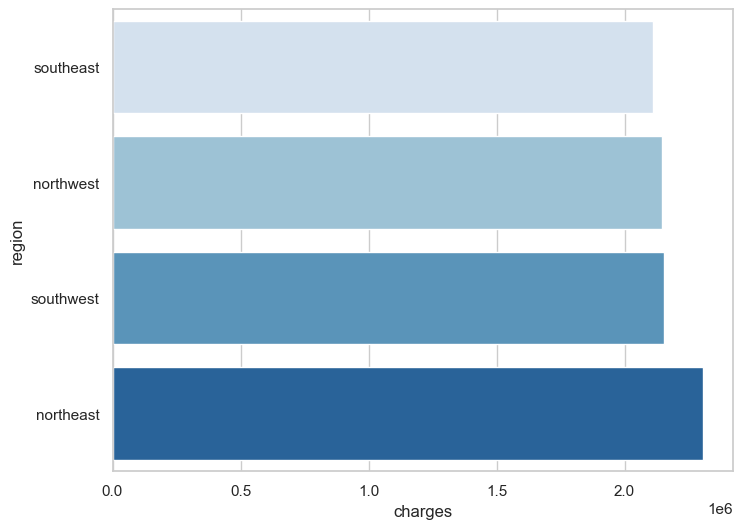

In [137]:
charges = df_cleaned['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x= charges.head(), y=charges.head().index, palette='Blues')
plt.show()


In [138]:
df_cleaned.isnull().sum()

age                        1
sex                        0
bmi                        0
children                   0
smoker                     0
region                     0
charges                    0
disease                    0
sed_pd                   311
junk_food_consumption    311
alcohol_consumption      311
exercise_routine         311
substance_use            311
stress_level             311
charges_bins               0
dtype: int64

In [139]:
styled_data = (
    df_cleaned.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_data

,age,bmi,children,charges
mean,38.372659,30.092376,1.075772,8153.051666
std,13.941829,5.853846,1.221247,4931.368671
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4032.240700
50%,38.000000,29.830000,1.000000,7441.053000
75%,50.000000,33.915000,2.000000,11534.872650
max,64.000000,45.900000,5.000000,20984.093600


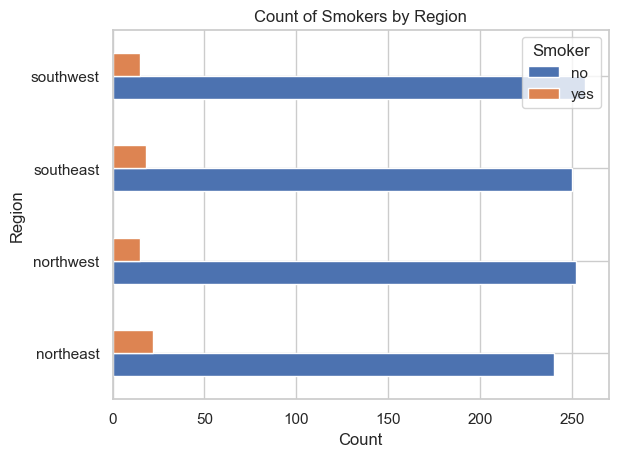

In [140]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

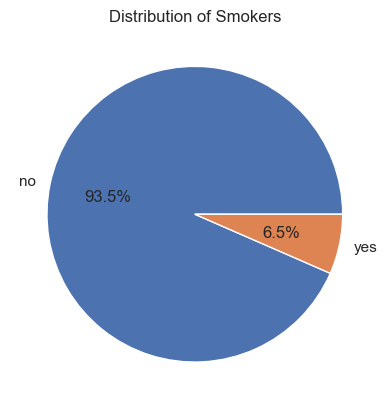

In [141]:
smoker_counts = df_cleaned['smoker'].value_counts() 
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of Smokers')
plt.show()

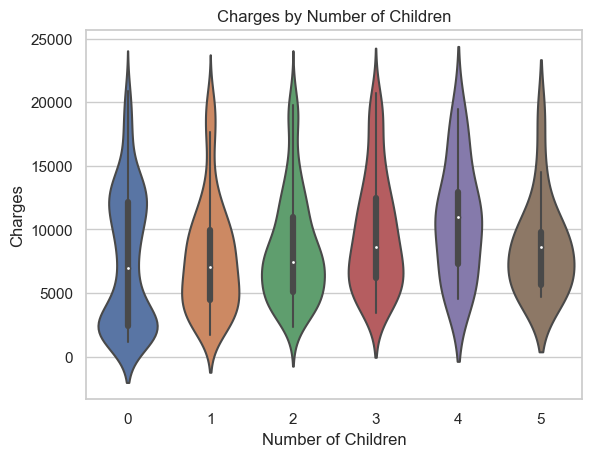

In [142]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

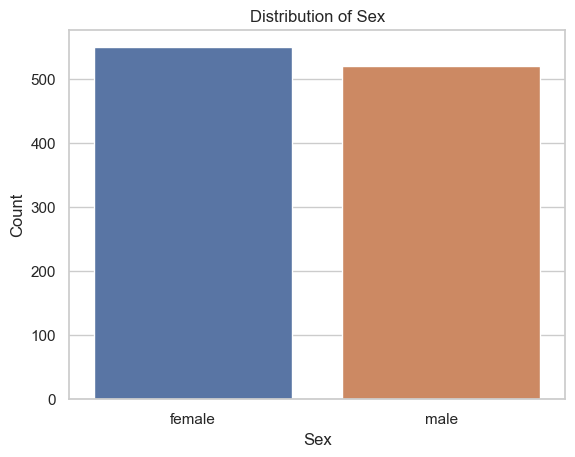

In [143]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

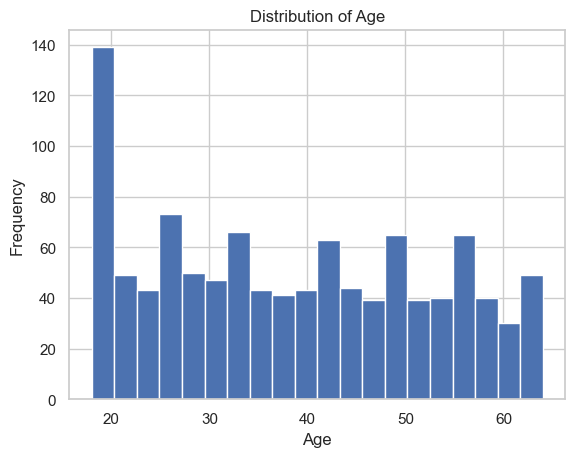

In [144]:
# distribution of age using histogram
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

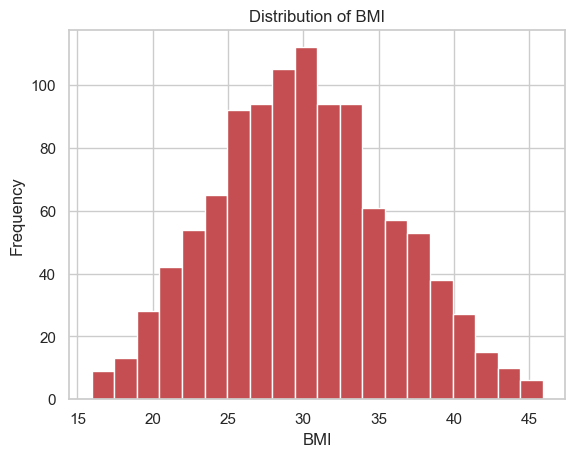

In [145]:
# distribution of BMI using histogram
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

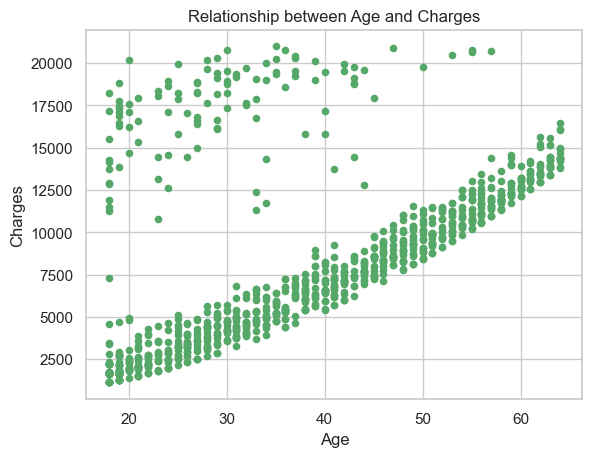

In [146]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

In [147]:
df['disease'].unique()

array(['Chickenpox', 'Hypoglycemia', 'Dengue', 'Urinary tract infection',
       'GERD (Gastroesophageal Reflux Disease)', 'Migraine',
       'Gastroenteritis', 'Paroxysmal Positional Vertigo (Vertigo)',
       'Arthritis', 'Cervical spondylosis', 'Hepatitis A', 'Diabetes',
       'Allergy', 'Osteoarthritis', 'Fungal infection', 'Hyperthyroidism',
       'AIDS', 'Tuberculosis', 'Chronic cholestasis', 'Drug Reaction',
       'Dimorphic hemorrhoids (piles)', 'Bronchial Asthma', 'Jaundice',
       'Varicose veins', 'Hypothyroidism', 'Malaria',
       'Alcoholic hepatitis', 'Hepatitis D', 'Hepatitis B',
       'Paralysis (brain hemorrhage)', 'Heart attack', 'Typhoid'],
      dtype=object)

In [148]:
df_cleaned['charges_bins'].unique()

array(['A'], dtype=object)

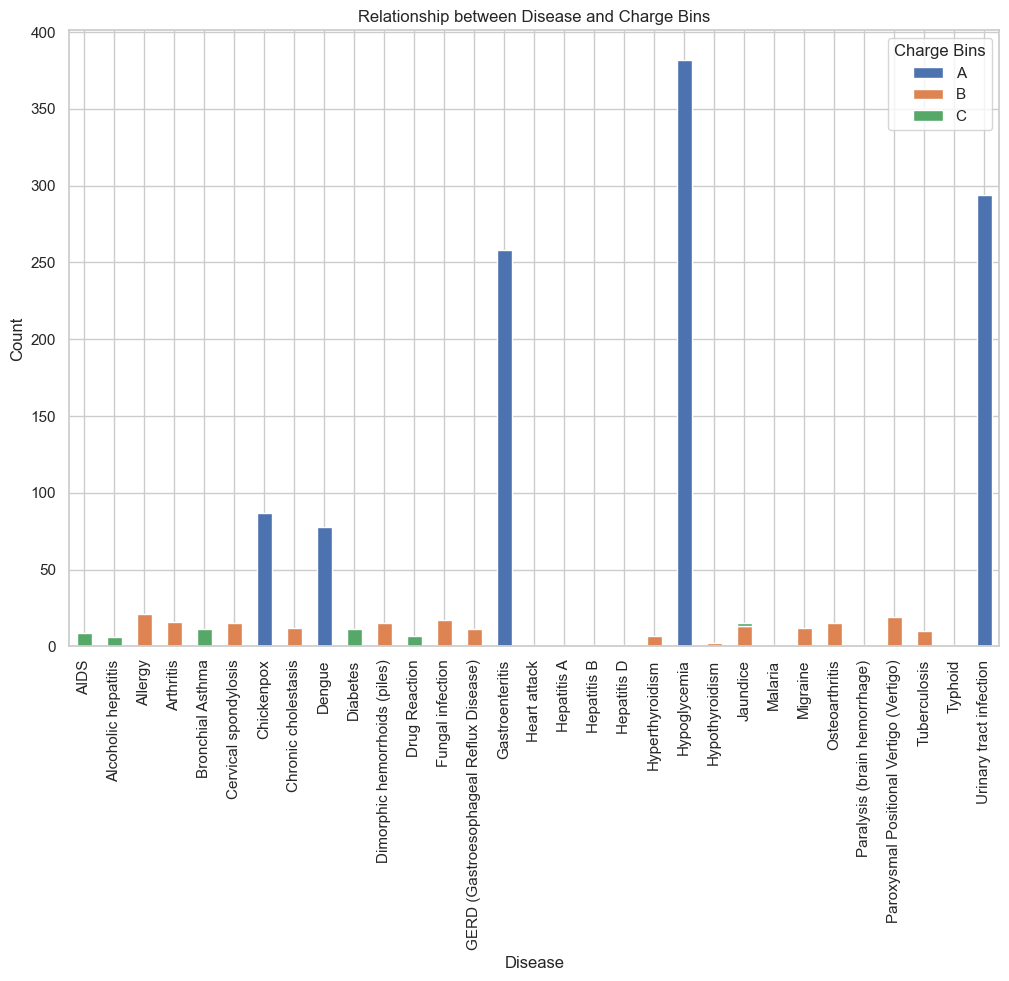

In [149]:
grouped_data = df.groupby(['disease', 'charges_bins']).size().unstack().fillna(0)

# Plot the data as a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Disease and Charge Bins')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.legend(title='Charge Bins')
plt.show()

There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

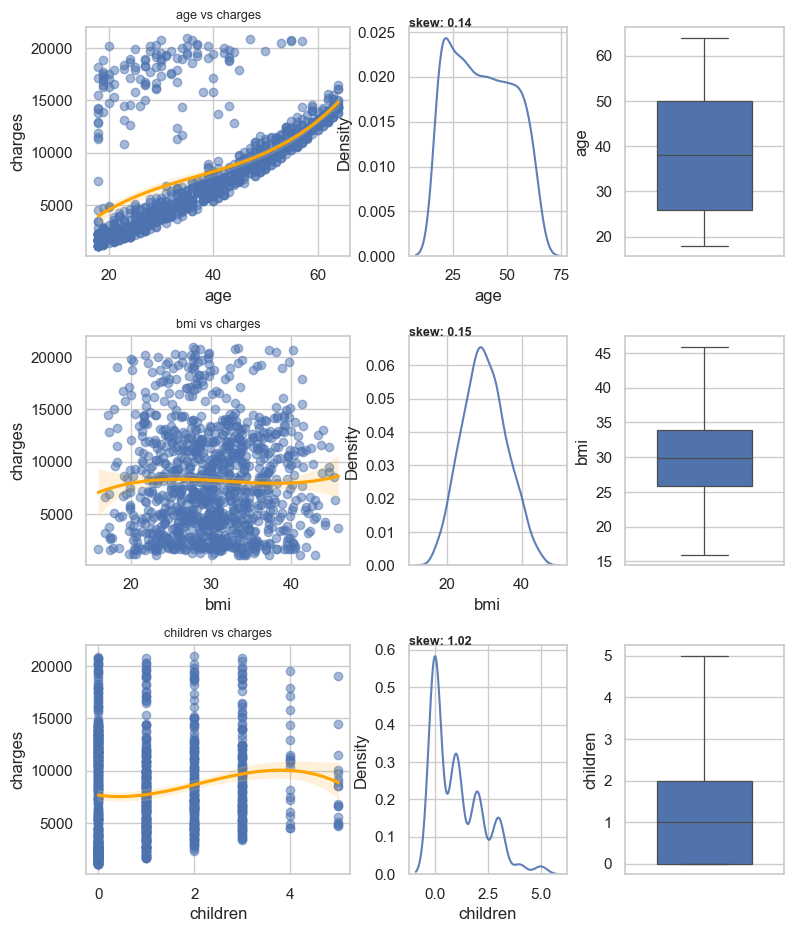

In [150]:
number_columns = df_cleaned.select_dtypes("number").drop("charges", axis=1)

skewness_before_log = df_cleaned[number_columns.columns].skew()
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(9, 11),
    gridspec_kw={"hspace": 0.35, "wspace": 0.3, "width_ratios": [0.5, 0.3, 0.3]},
)
axes = axes.flatten()
i = 0
for column in number_columns.columns:
    ax = axes[i]
    sns.regplot(
        data=df_cleaned,
        x=column,
        y="charges",
        ax=ax,
        scatter_kws={"alpha": 0.5},
        marker="o",
        line_kws={"color": "orange"},
        order=3,
    )
    ax.set_title(f"{column} vs charges", size=9)
    ax = axes[i + 1]
    sns.kdeplot(data=df_cleaned, x=column, ax=ax, fill=False, alpha=0.9, legend=True)
    skewness = skewness_before_log[column]
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight="bold",
    )

    ax = axes[i + 2]
    sns.boxplot(
        data=df_cleaned,
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )
    i += 3
plt.show()


In [151]:
df_cleaned['exercise_routine'].unique()

array([nan, ' ', 'frequently', 'daily', 'rarely', 'no'], dtype=object)

In [154]:
df_cleaned['alcohol_consumption'].unique()

array([nan, 'no', 'rarely', ' ', 'daily', 'frequently'], dtype=object)

In [155]:
df_cleaned['junk_food_consumption'].unique()

array([nan, ' ', 'daily', 'frequently', 'rarely'], dtype=object)

In [ ]:
df['sedantry period'].unique()

array([nan, '12hrs', '2hrs', 'whole day', '4hrs', '6hrs', ' ', '8hrs'],
      dtype=object)

In [156]:
df['sed_pd'] = df['sed_pd'].str.replace('hrs', '', regex=False)
df['sed_pd'].unique()

array([nan, '12', '2', 'whole day', '4', '6', ' ', '8'], dtype=object)

In [157]:
df['substance_use'].unique()

array([nan, 'no', ' ', 'yes'], dtype=object)

In [158]:
df['stress_level'].unique()

array([nan, ' ', 'high', 'medium', 'low'], dtype=object)

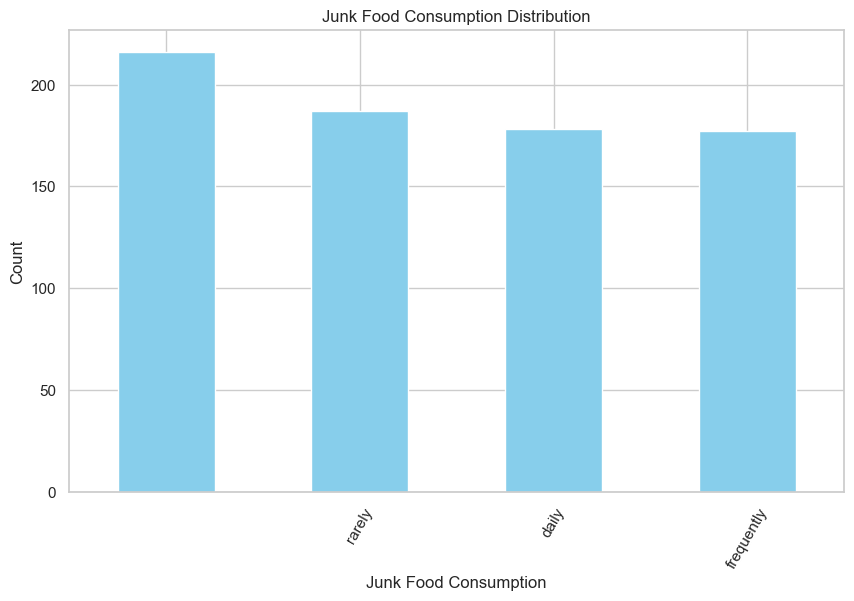

In [159]:
charge_bins_counts = df_cleaned['junk_food_consumption'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Junk Food Consumption Distribution')
plt.xlabel('Junk Food Consumption')
plt.ylabel('Count')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

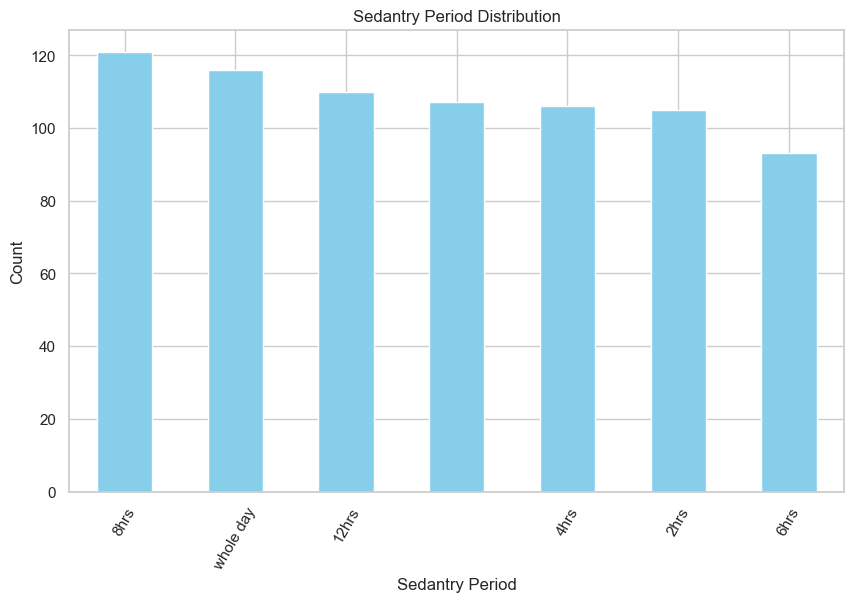

In [160]:
charge_bins_counts = df_cleaned['sed_pd'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Sedantry Period Distribution')
plt.xlabel('Sedantry Period')
plt.ylabel('Count')
plt.xticks(rotation=60)  
plt.show()

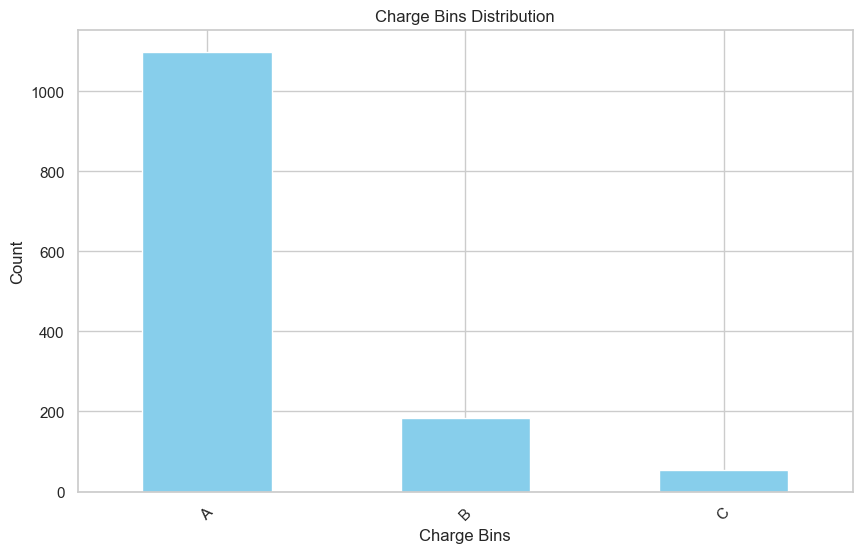

In [ ]:
charge_bins_counts = df_cleaned['charges_bins'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Charge Bins Distribution')
plt.xlabel('Charge Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

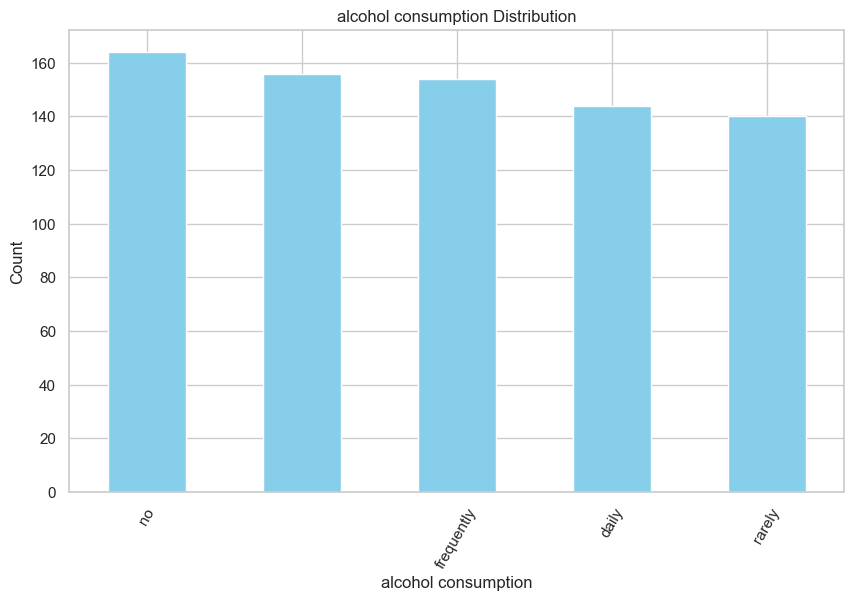

In [161]:
charge_bins_counts = df_cleaned['alcohol_consumption'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('alcohol consumption Distribution')
plt.xlabel('alcohol consumption')
plt.ylabel('Count')
plt.xticks(rotation=60)  
plt.show()

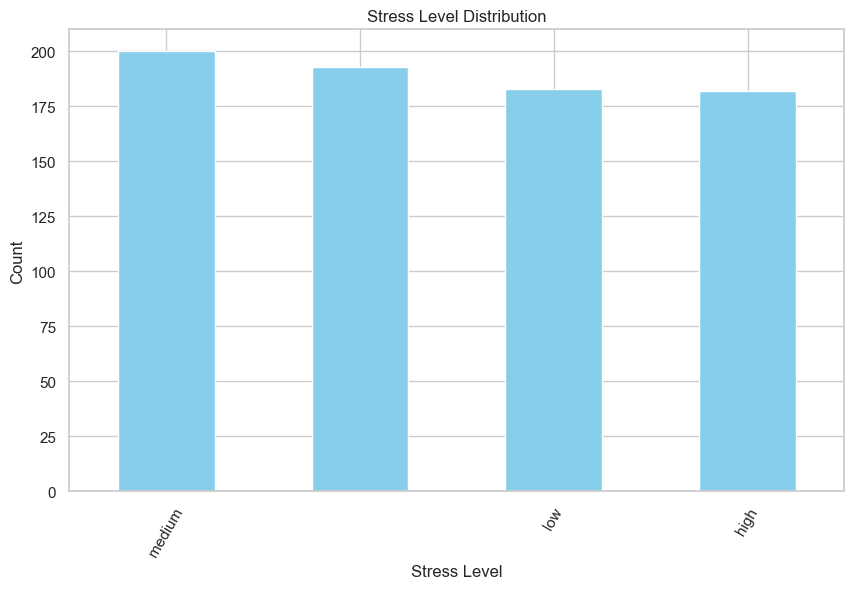

In [163]:
charge_bins_counts = df_cleaned['stress_level'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=60)  
plt.show()

## Preprocessing